In [1]:
from pretty_plot import *

In [2]:
def check_bench(first, second, first_name='true countermodels turned off',
                second_name='true countermodels turned on', bench=10):
    X = 0
    Y = 0
    for i in range(len(first)):
        if first[i] > bench:
            X += 1
            if second[i] < first[i]:
                Y += 1
    print('Of the {} tests which took more than {} seconds to run with {},'.format(X, bench, first_name))
    print('{} were faster with {}.'.format(Y, second_name))

In [3]:
# Process main results
main_results = [
    'FOSSIL-out-new.txt',
    'FOSSIL-out-run2.txt',
]
M = len(main_results)
#names, results_cex = process_done('cex_out.txt')
#cex = [results_cex[name][0] for name in names]
names, results_cex = process_done(main_results[0])
cex = [0] * len(results_cex)
for run_results in main_results:
    _, results_run = process_done(run_results)
    run = [results_run[name][0] for name in names]
    for i,name in enumerate(names):
        if name != 'maxheap-htree-key':
            cex[i] += run[i] / M
        elif run_results != 'FOSSIL-out-run2.txt':
            cex[i] += run[i] / (M-1) 
cex_max = max(cex)

## 1. No LFP counterexamples

In [4]:
# Process comparison
_, results_nocex = process_done('no-true-cex-new.txt')
nocex = [results_nocex[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

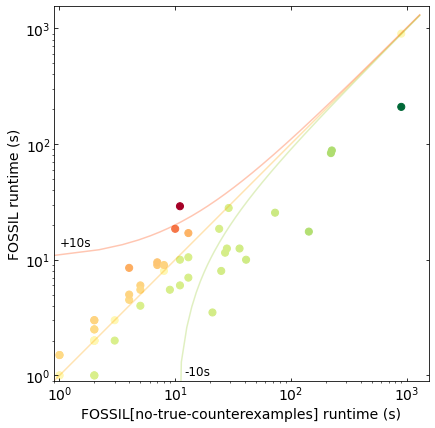

Of the 20 tests which took more than 10 seconds to run with true countermodels turned off,
17 were faster with true countermodels turned on.


In [5]:
# Plot
m = max([max(nocex), cex_max])
x = adjust(nocex, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[no-true-counterexamples]', tm_val=m+1)
check_bench(x, y)

<Figure size 432x288 with 0 Axes>

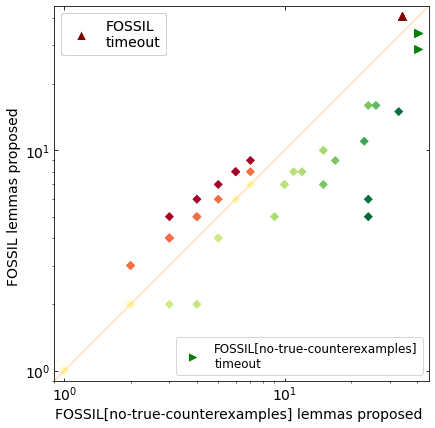

In [6]:
# Plot lemma proposals
cex_prop = [results_cex[name][1] for name in names]
nocex_prop = [results_nocex[name][1] for name in names]
m = max([max(nocex_prop), max(cex_prop)])
x_prop = adjust(nocex_prop, mx=m)
y_prop = adjust(cex_prop, mx=m)
pretty_plot(x_prop, y_prop, x_name='FOSSIL[no-true-counterexamples]', tm_val=m+1, mark='D', y_leg='upper left',
            log=True, square=True, measurement='lemmas proposed', unit=None, bands=False)

<Figure size 432x288 with 0 Axes>

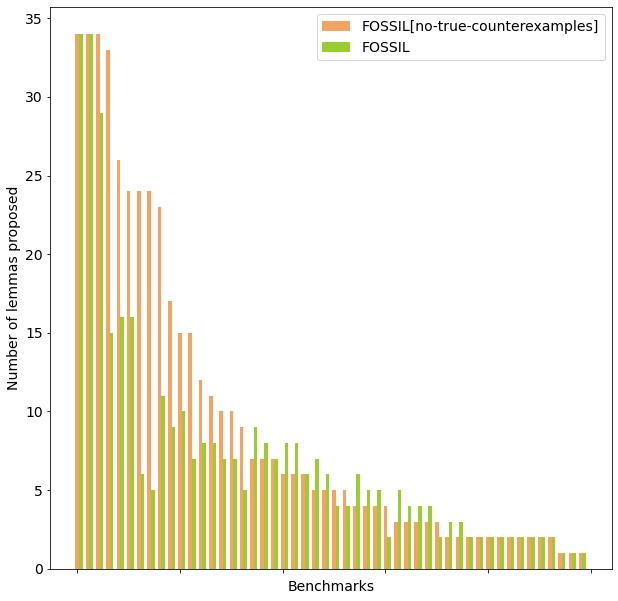

In [7]:
# Alternative plot to above scatterplot for lemmas proposed
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

fig = plt.figure()
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
rect_bar = [left, bottom, width, height]

# Start with a rectangular Figure
plt.figure(figsize=(12, 12))
ax = plt.axes(rect_bar)

#y_prop = [yi for _, yi in sorted(zip(x, y_prop), reverse=True)]
#x_prop = [xi for _, xi in sorted(zip(x, x_prop), reverse=True)]
y_prop = [yi for _, yi in sorted(zip(x_prop, y_prop), reverse=True)]
x_prop = sorted(x_prop, reverse=True)

N = len(names)
ind = np.arange(N)  # the x locations for the groups
width = 0.35      #  the width of the bars

rects1 = ax.bar(ind,         x_prop, width, color='sandybrown')
rects2 = ax.bar(ind + width, y_prop, width, color='yellowgreen')

ax.set_ylabel('Number of lemmas proposed')
ax.set_xlabel('Benchmarks')
#ax.set_xlabel('Benchmarks ordered by FOSSIL[no-true-counterexamples] runtime')
#ax.set_xlabel('Benchmarks ordered by FOSSIL runtime')
ax.set_xticklabels([])
ax.set_title('')

ax.legend((rects1[0], rects2[0]), ('FOSSIL[no-true-counterexamples]', 'FOSSIL'))
fig.tight_layout()
plt.savefig('plots/bar_FOSSIL[no-true-counterexamples]-FOSSIL_lemmas-proposed.png',
            bbox_inches = 'tight', pad_inches = 0.2, dpi=100)
plt.show()

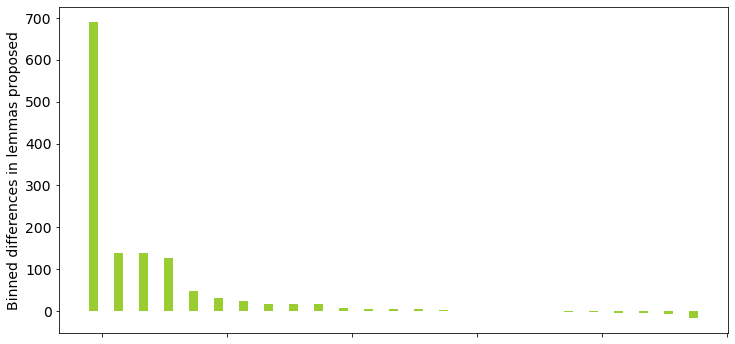

0


In [8]:
# Alternative plot to above bar plot for lemmas proposed, single relative bars
import matplotlib.pyplot as plt

y = [y for _, y in sorted(zip(x, y), reverse=True)]
x = sorted(x, reverse=True)
z = list(set([-(y[i]-xi) for i,xi in enumerate(x)]))
z.remove(0)
z.append(0.3)
z = sorted(z, reverse=True)

N = len(z)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects = ax.bar(ind - width, z, width, color='yellowgreen')

ax.set_ylabel('Binned differences in lemmas proposed')
ax.set_title('')
ax.set_xticklabels([])

plt.show()
print(sum(np.array(z)==0))

## 2. CVC4Sy

In [9]:
# Process comparison
_, results_cvc4sy = process_done('cvc4sy-new.txt')
cvc4sy = [results_cvc4sy[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

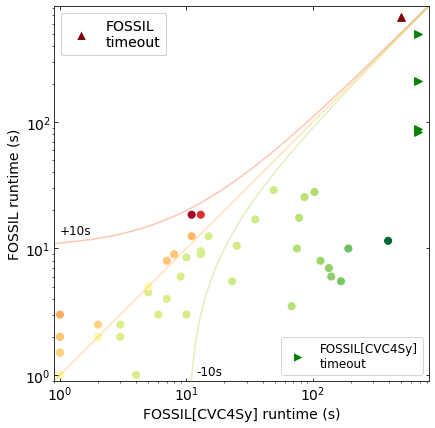

Of the 25 tests which took more than 10 seconds to run with CVC4Sy,
21 were faster with minisy.


In [10]:
# Plot
m = 500 #max([max(cvc4sy), cex_max])
x = adjust(cvc4sy, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[CVC4Sy]', y_leg='upper left')
check_bench(x, y, first_name='CVC4Sy', second_name='minisy')

## 3. No counterexamples (streaming)

In [11]:
# Process comparison
_, results_streaming = process_done('streaming-new.txt')
streaming = [results_streaming[name][0] for name in names]

<Figure size 432x288 with 0 Axes>

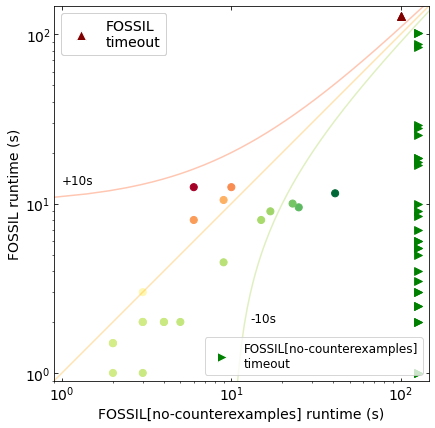

In [12]:
# Plot
m = 100 #max([max(streaming), cex_max])
x = adjust(streaming, mx=m)
y = adjust(cex, mx=m)
pretty_plot(x, y, x_name='FOSSIL[no-counterexamples]', y_leg='upper left', offset_band_label=True)

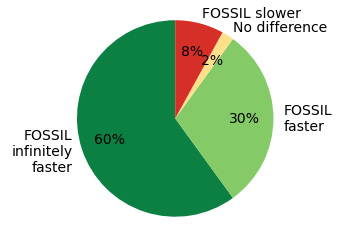

When FOSSIL was faster, it was on average 109.5% faster.
When FOSSIL was slower, it was on average 27.8% slower.


In [13]:
# Pie chart
from matplotlib import cm

timeouts = 0
faster = 0
faster_pct = []
equal = 0
slower = 0
slower_pct = []
for i in range(len(x)):
    if x[i] > 100:
        timeouts += 1
    elif x[i] > y[i]:
        faster += 1
        faster_pct.append((x[i]-y[i])/y[i])
    elif x[i] == y[i]:
        equal += 1
    else:
        slower += 1
        slower_pct.append((y[i]-x[i])/y[i])
        
labels = ['FOSSIL\ninfinitely\nfaster', 'FOSSIL\nfaster', 'No difference', 'FOSSIL slower']
sizes = [timeouts, faster, equal, slower]
explode = (0, 0, 0, 0)
cmap = cm.get_cmap('RdYlGn')
colors = [cmap(0.95), cmap(0.75), cmap(0.4), cmap(0.1)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.f%%', pctdistance=0.7,
        startangle=90, radius=1)
ax1.axis('equal')
fig.tight_layout()
plt.savefig('plots/pie_FOSSIL[no-counterexamples]-FOSSIL_runtime.png',
            bbox_inches = 'tight', pad_inches = 0.2)
plt.show()

print('When FOSSIL was faster, it was on average {:.1f}% faster.'.format(100*np.mean(faster_pct)))
print('When FOSSIL was slower, it was on average {:.1f}% slower.'.format(100*np.mean(slower_pct)))